In [1]:
import numpy as np
import pandas as pd

### import data

In [2]:
df = pd.read_csv('C:/Users/icbc/Desktop/Kaggle/practice/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### data explore

#### 单变量探索

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

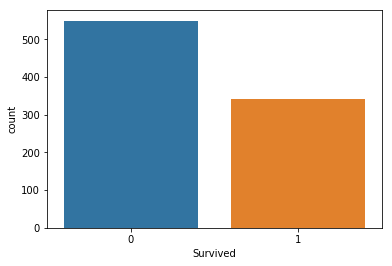

In [9]:
sb.countplot(df.Survived)

In [10]:
# percenties of survived is :
df.Survived.value_counts()[-1:].values/ 891

array([0.38383838])

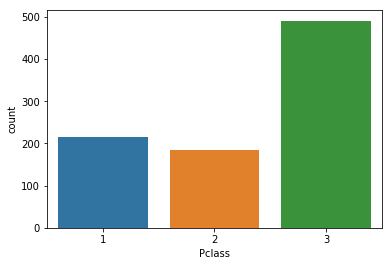

In [11]:
sb.countplot(df.Pclass)

In [12]:
df.Pclass.value_counts()/891

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [13]:
# df.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


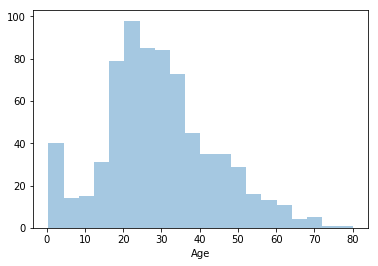

In [14]:
sb.distplot(df.Age.dropna(), kde=False)

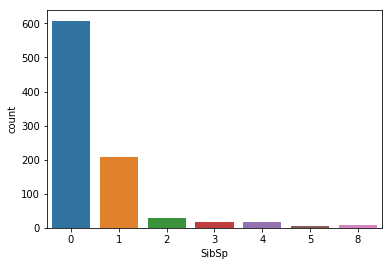

In [15]:
sb.countplot(df.SibSp)

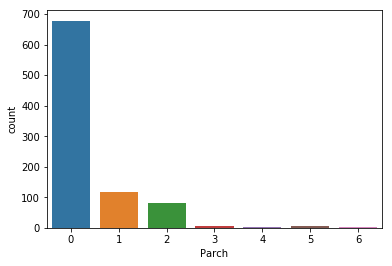

In [16]:
sb.countplot(df.Parch)

#### 多变量探索

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


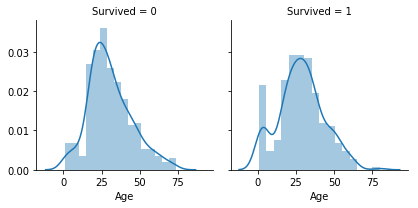

In [17]:
g = sb.FacetGrid(df[['Survived','Age']], col="Survived")
g.map(sb.distplot, "Age", kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


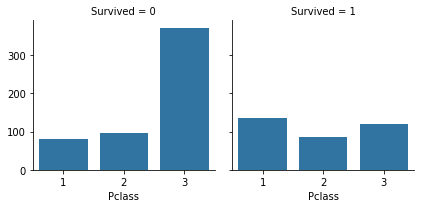

In [18]:
g = sb.FacetGrid(df[['Survived','Pclass']], col="Survived")
g.map(sb.countplot, "Pclass")

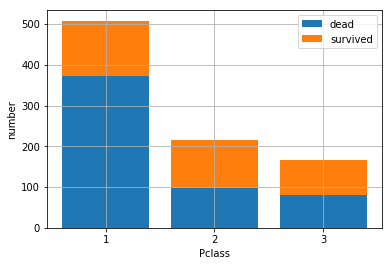

In [19]:
s = df.query('Survived==0').Pclass.value_counts()
y = df.query('Survived==1').Pclass.value_counts()
x = [1,2,3]
plt.bar(x, s, )
plt.bar(x, y, bottom=s, )
plt.xticks([1,2,3])
plt.ylabel('number')
plt.xlabel('Pclass')
plt.grid()
plt.legend(['dead','survived'])

In [20]:
pd.Series(s).values.tolist()

[372, 97, 80]

In [21]:
from pyecharts.charts import Bar
from pyecharts import options as opts
bar = Bar()
bar.add_xaxis(x)
bar.add_yaxis('dead', pd.Series(s).values.tolist())
bar.add_yaxis('survived', pd.Series(y).values.tolist())
bar.set_global_opts(title_opts=opts.TitleOpts(title='Num of survived group by pclass'))
bar.render_notebook()

In [22]:
# s

In [23]:
# y

In [24]:
y/(s+y)

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

可见一等舱存活率最高，其次二等舱，最差三等舱

##### 性别方面

In [25]:
df.Sex.value_counts()/df.shape[:1]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [26]:
sex_1 = df.query('Survived==1').Sex.value_counts()
sex_1

female    233
male      109
Name: Sex, dtype: int64

In [27]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
df.query('Survived==1').SibSp.value_counts()/df.SibSp.value_counts()

0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64

In [30]:
df.Parch.value_counts()/891

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [31]:
df.query('Survived==1').Parch.value_counts()/df.Parch.value_counts()

0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: Parch, dtype: float64

In [32]:
df.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [33]:
df.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [34]:
df.Ticket.value_counts().sort_values(ascending=False).head(10)

347082          7
CA. 2343        7
1601            7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
W./C. 6608      4
349909          4
Name: Ticket, dtype: int64

In [35]:
df.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [36]:
df.groupby('Survived').Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [37]:
df.Embarked.dropna().value_counts()/889

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [38]:
df.query('Survived==1').Embarked.dropna().value_counts()/df.Embarked.dropna().value_counts()

S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64

#### 变量处理

年龄采用算法拟合， Cabin直接删除列， Embarked使用频次最高S填充

In [39]:
# df.drop('Cabin', axis=1, inplace=True)

In [40]:
# df.shape

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


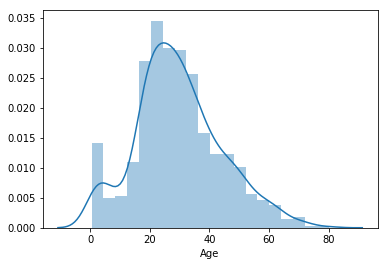

In [41]:
sb.distplot(df.Age.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


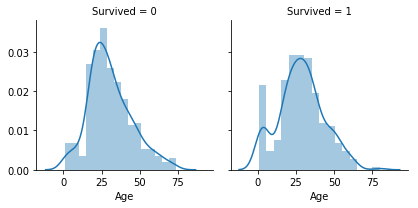

In [42]:
g = sb.FacetGrid(df, col='Survived')
g.map(sb.distplot, 'Age', )

##### Age拟合

In [43]:
# df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


性别变量使用onehot，名字变量暂时删除，船票号变量删除，Embarked变量onehot转换 

In [44]:
df.drop(['Name','Ticket','PassengerId','Cabin'], axis=1, inplace=True)

In [45]:
# df.drop('sex_one_hot', axis=1, inplace=True)
df.Embarked.fillna('S', inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 48.8+ KB


In [47]:
from sklearn.preprocessing import OneHotEncoder
a = df[['Sex', 'Embarked']]
ohe = OneHotEncoder()
ohe.fit(a.head(20))
b = ohe.transform(a).toarray()
b.shape

(891, 5)

In [48]:
c = df.drop(['Sex', 'Embarked'], axis=1)
print(c.head())
d = np.concatenate((np.array(c), b), axis=1)
d.shape

   Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


(891, 11)

In [49]:
# l = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', '','', '', '', '']

In [50]:
data_all = pd.DataFrame(d, columns=l)
data_all.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,,,,,
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [51]:
e = data_all.dropna()
e.shape

(714, 11)

In [52]:
# 划分测试验证集
# df_agena = df[df.Age.isna()]
from sklearn.model_selection import train_test_split, cross_val_score
# data_age = df[df.Age.notnull()]
X = e.drop('Age', axis=1)
y = e.Age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [53]:
X_test.shape

(143, 10)

In [54]:
# 交叉验证选择模型
from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.ensemble import p
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import pipeline
clf1 = LinearRegression()
clf2 = RandomForestRegressor(random_state=11)
clf3 = DecisionTreeRegressor(random_state=2)
clf4 = ExtraTreesRegressor(random_state=15)
clf5 = Ridge()
score1 = cross_val_score(clf1, X_train, y_train, cv=5)
score2 = cross_val_score(clf2, X_train, y_train, cv=5)
score3 = cross_val_score(clf3, X_train, y_train, cv=5)
score4 = cross_val_score(clf4, X_train, y_train, cv=5)
score5 = cross_val_score(clf5, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))
# print("Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
# print("Accuracy: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std() * 2))
# print("Accuracy: %0.2f (+/- %0.2f)" % (score4.mean(), score4.std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (score5.mean(), score5.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Accuracy: 0.22 (+/- 0.10)
Accuracy: 0.22 (+/- 0.10)


In [55]:
from sklearn.preprocessing import PolynomialFeatures
clf1 = pipeline.make_pipeline(PolynomialFeatures(2),
                              LinearRegression(fit_intercept=True, normalize=True))
clf1.fit(X_train, y_train)
y_pre =clf1.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

-83.050572595271

可见采用模型拟合效果非常差

##### Age拉格朗日插值

In [57]:
#coding:utf-8
import pandas as pd
from scipy.interpolate import lagrange#拉格朗日函数

# data_all['Age_new'] = 0
ll = []

#自定义列向量插值函数
def ploy(s,n,k=6):
    y=s[list(range(n-k,n))+list(range(n+1,n+1+k))]#取数
    y=y[y.notnull()]
    return lagrange(y.index,list(y))(n)

for j in range(len(data_all)):
    if(data_all['Age'].isna())[j]:
#         data_all['Age'][j]=ploy(data_all['Age'],j) 
#         data_all['Age'][j].fillna(ploy(data_all['Age'],j))
        ll.append(ploy(data_all['Age'],j))
    else:
        ll.append(data_all['Age'][j])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [58]:
len(ll)

891

In [59]:
data_all['Age_new'] = pd.Series(ll)

In [60]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
Age         714 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
Fare        891 non-null float64
            891 non-null float64
            891 non-null float64
            891 non-null float64
            891 non-null float64
            891 non-null float64
Age_new     891 non-null float64
dtypes: float64(12)
memory usage: 83.6 KB


In [61]:
data_all.drop('Age', axis=1, inplace=True)

In [62]:
data_all.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', '', '', '', '', '',
       'Age_new'],
      dtype='object')

### 模型建立

In [63]:
# split test and train/
from sklearn.model_selection import train_test_split
X = data_all.drop('Survived', axis=1)
y = data_all.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3)
# train = pd.concat(X_train, y_train)
# test = pd.concat(X_test, y_test)


In [64]:
# X_train.shape

In [65]:
col = ['Pclass', 'SibSp', 'Parch', 'Fare', 'sex1', 'sex2', 'em1', 'em2', 'em3', 'Age_new']
X_train.columns = col
X_test.columns = col
X.columns = col

In [66]:
X_train.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'sex1', 'sex2', 'em1', 'em2', 'em3',
       'Age_new'],
      dtype='object')

#### 模型选择

In [67]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import logistic
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')

clf1 = logistic.LogisticRegression()
clf2 = RandomForestClassifier(random_state=1)
clf3 = ExtraTreesClassifier(random_state=2)
clf4 = DecisionTreeClassifier(random_state=3)
clf5 = SVC()
clf6 = XGBClassifier(random_state=4)
# cross_validate(clf1, X, y,  cv=5, return_train_score=True)
print('logist score is {:.2f}'.format(cross_val_score(clf1,X,y,cv=5, scoring='accuracy').mean()))
print('rf score is {:.2f}'.format(cross_val_score(clf2,X,y,cv=5, scoring='accuracy').mean()))
print('et score is {:.2f}'.format(cross_val_score(clf3,X,y,cv=5, scoring='accuracy').mean()))
print('dt score is {:.2f}'.format(cross_val_score(clf4,X,y,cv=5, scoring='accuracy').mean()))
print('svc score is {:.2f}'.format(cross_val_score(clf5,X,y,cv=5, scoring='accuracy').mean()))
print('xg score is {:.2f}'.format(cross_val_score(clf6,X,y,cv=5, scoring='accuracy').mean()))

logist score is 0.45
rf score is 0.81
et score is 0.79
dt score is 0.75
svc score is 0.68
xg score is 0.82


xgb和rf效果较好

#### 模型建立、调参、评估

In [80]:
clf2.fit(X_train, y_train)
y_pre = clf2.predict(X_test)
from sklearn.metrics import accuracy_score
print('acc of rf is {:.2f}'.format(accuracy_score(y_test, y_pre)))

acc of rf is 0.78


In [111]:
# randomforest
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[200, 300, 400, 500],
              'criterion':['gini', 'entropy'],
              'max_depth':[3,4,5]
             }
gs = GridSearchCV(clf2, param_grid, scoring='accuracy',
             fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, 
             pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
gs.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [112]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}

In [81]:
y_pre = gs.best_estimator_.predict(X_test)

In [82]:
print('acc of rf_turned is {:.2f}'.format(accuracy_score(y_test, y_pre)))

acc of rf_turned is 0.76


In [140]:
# pprint(classification_report(y_train, gs.best_estimator_.predict(X_train)))

In [79]:
#coding:gbk
clf6.fit(X_train, y_train)
y_pre = clf6.predict(X_test)
# print(classification_report(y_test, y_pre))
from sklearn.metrics import accuracy_score
print('acc of xgb is {:.2f}'.format(accuracy_score(y_test, y_pre)))

acc of xgb is 0.77


In [139]:
#  pprint(classification_report(y_train, clf6.predict(X_train)))

In [141]:
XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, 
              silent=True, objective='binary:logistic', booster='gbtree',
              n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
              max_delta_step=0, subsample=1, colsample_bytree=1, 
              colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
              base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

In [69]:
# xgboost turning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[200, 300, 400, 500],
              'max_depth':[3,4,5],
              'learning_rate':[.01,.1,.03,.05,.07]
             }
gs = GridSearchCV(clf6, param_grid, scoring='accuracy',
             fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, 
             pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
gs.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=4,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 400, 500], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.03, 0.05, 0.07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [70]:
gs.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 300}

In [72]:
y_pre_xg = gs.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pre_xg))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       109
         1.0       0.70      0.69      0.69        70

   micro avg       0.76      0.76      0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [77]:
from sklearn.metrics import accuracy_score
print('acc of xgb_turned is {:.2f}'.format(accuracy_score(y_test, y_pre_xg)))

acc of xgb_turned is 0.76


日了狗了，居然调参后都不如未调参模型。另外rf效果好于xgb。考虑在数据上做文章

#### 分析姓名变量进行衍生

In [67]:
df = pd.read_csv('C:/Users/icbc/Desktop/Kaggle/practice/train.csv')
# df.Name[745]

In [68]:
lll = []
import re
re.search('Master|Mr|Miss|Mrs', df.Name.iloc[890]).group()
for i in np.arange(df.Name.size):
    a = re.search('(?<=\\,).*?(?=\\.)', df.Name.iloc[i]).group()
    lll.append(a)
# l

In [69]:
df['title'] = pd.Series(lll)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


##### 衍生变量单变量分析

In [70]:
df.title.unique().size

17

##### 与目标变量相关性分析

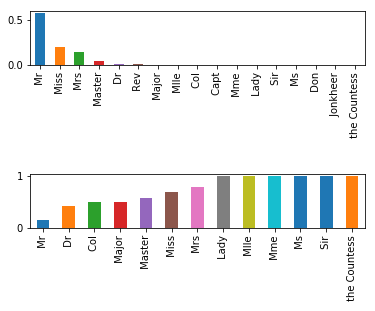

In [72]:
# plt.figure(1)
plt.subplot(211)
x = df.title.value_counts()/891
x.plot.bar()
plt.subplot(212)
y = df.query('Survived==1').title.value_counts()/df.title.value_counts()
y.dropna().sort_values().plot.bar()

# df.query('Survived==1').title.value_counts().sort_values(ascending=True).plot.bar()
plt.subplots_adjust(wspace =0, hspace =2)#调整子图间距

忽略原本在样本中占比较少的称谓，部分称谓例如Master、Miss、Mrs存活率都较高，可见与目标变量存在较高相关性。
因此考虑将该变量入模

##### 数据处理

In [74]:
df.drop(['Name','Ticket','PassengerId','Cabin'], axis=1, inplace=True)
df.Embarked.fillna('S', inplace=True)
from sklearn.preprocessing import OneHotEncoder
a = df[['Sex', 'Embarked']]
ohe = OneHotEncoder()
ohe.fit(a.head(20))
# b = ohe.transform(a).toarray()
b = ohe.fit_transform(a).toarray()
# b.shape
c = df.drop(['Sex', 'Embarked'], axis=1)
# print(c.head())
d = np.concatenate((np.array(c), b), axis=1)
d.shape
col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','title', 'sex1', 'sex2', 'em1', 'em2', 'em3']
data_all = pd.DataFrame(d, columns=col)
data_all.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,title,sex1,sex2,em1,em2,em3
0,0,3,22,1,0,7.25,Mr,0,1,0,0,1
1,1,1,38,1,0,71.2833,Mrs,1,0,1,0,0
2,1,3,26,0,0,7.925,Miss,1,0,0,0,1
3,1,1,35,1,0,53.1,Mrs,1,0,0,0,1
4,0,3,35,0,0,8.05,Mr,0,1,0,0,1


In [76]:
#coding:utf-8
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.interpolate import lagrange#拉格朗日函数

# data_all['Age_new'] = 0
ll = []

#自定义列向量插值函数
def ploy(s,n,k=6):
    y=s[list(range(n-k,n))+list(range(n+1,n+1+k))]#取数
    y=y[y.notnull()]
    return lagrange(y.index,list(y))(n)

for j in range(len(data_all)):
    if(data_all['Age'].isna())[j]:
#         data_all['Age'][j]=ploy(data_all['Age'],j) 
#         data_all['Age'][j].fillna(ploy(data_all['Age'],j))
        ll.append(ploy(data_all['Age'],j))
    else:
        ll.append(data_all['Age'][j])
data_all['age'] = pd.Series(ll)
data_all.drop('Age', axis=1, inplace=True)
data_all.head()

,Survived,Pclass,SibSp,Parch,Fare,title,sex1,sex2,em1,em2,em3,age
0,0,3,1,0,7.25,Mr,0,1,0,0,1,22.0
1,1,1,1,0,71.2833,Mrs,1,0,1,0,0,38.0
2,1,3,0,0,7.925,Miss,1,0,0,0,1,26.0
3,1,1,1,0,53.1,Mrs,1,0,0,0,1,35.0
4,0,3,0,0,8.05,Mr,0,1,0,0,1,35.0


In [127]:
from category_encoders import HashingEncoder
data = HashingEncoder(cols='title').fit_transform(data_all)
# dd = encoding.transform(data_all['title'])
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Survived,Pclass,SibSp,Parch,Fare,sex1,sex2,em1,em2,em3,age
0,1,0,0,0,0,0,0,0,0,3,1,0,7.25,0,1,0,0,1,22.000000
1,0,0,0,0,0,0,0,1,1,1,1,0,71.2833,1,0,1,0,0,38.000000
2,0,0,0,0,0,1,0,0,1,3,0,0,7.925,1,0,0,0,1,26.000000
3,0,0,0,0,0,0,0,1,1,1,1,0,53.1,1,0,0,0,1,35.000000
4,1,0,0,0,0,0,0,0,0,3,0,0,8.05,0,1,0,0,1,35.000000
5,1,0,0,0,0,0,0,0,0,3,0,0,8.4583,0,1,0,1,0,75.255411
6,1,0,0,0,0,0,0,0,0,1,0,0,51.8625,0,1,0,0,1,54.000000
7,0,0,0,0,1,0,0,0,0,3,3,1,21.075,0,1,0,0,1,2.000000
8,0,0,0,0,0,0,0,1,1,3,0,2,11.1333,1,0,0,0,1,27.000000
9,0,0,0,0,0,0,0,1,1,2,1,0,30.0708,1,0,1,0,0,14.000000


In [140]:
# col_data = data.columns
# data = pd.DataFrame(np.array(data), columns=col_data)
# # data.info()

In [139]:
# data = pd.get_dummies(data_all.title)
# data.head()

##### 划分数据集

In [144]:
# split test and train/
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis=1).astype('float')
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3)
# train = pd.concat(X_train, y_train)
# test = pd.concat(X_test, y_test)

##### 模型建立（使用之前效果较好的rf和xgb）

In [145]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
clf2 = RandomForestClassifier(random_state=1)
clf6 = XGBClassifier(random_state=4)

In [152]:
clf2.fit(X_train, y_train.astype('int'))
clf6.fit(X_train, y_train.astype('int'))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=4,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [153]:
from sklearn.metrics import accuracy_score
print('acc of rf is {:.2f}'.format(accuracy_score(y_test.astype('int'), clf2.predict(X_test))))
print('acc of xgb is {:.2f}'.format(accuracy_score(y_test.astype('int'), clf6.predict(X_test))))

acc of rf is 0.81
acc of xgb is 0.80


###### 调参看效果

In [154]:
# randomforest
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[200, 300, 400, 500],
              'criterion':['gini', 'entropy'],
              'max_depth':[3,4,5]
             }
gs = GridSearchCV(clf2, param_grid, scoring='accuracy',
             fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, 
             pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
gs.fit(X_train, y_train.astype('int'))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [155]:
print('acc of rf is {:.2f}'.format(accuracy_score(y_test.astype('int'), gs.predict(X_test))))

acc of rf is 0.84


In [156]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}

In [157]:
# xgboost turning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[200, 300, 400, 500],
              'max_depth':[3,4,5],
              'learning_rate':[.01,.1,.03,.05,.07]
             }
gs_xgb = GridSearchCV(clf6, param_grid, scoring='accuracy',
             fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, 
             pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
gs_xgb.fit(X_train, y_train.astype('int'))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=4,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 400, 500], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.03, 0.05, 0.07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [158]:
print('acc of xgb is {:.2f}'.format(accuracy_score(y_test.astype('int'), gs_xgb.predict(X_test))))

acc of xgb is 0.75


In [159]:
gs_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}

调参后rf效果明显，xgb还是日狗状态。。。